In [34]:
import numpy as np
W_OV_lam_v_list = []
# 读取.npy文件
for layer_idx in range(1):
    W_OV_lam_v = np.load(f'datas\OV_datas\OV_arraylayer_{layer_idx}.npy',allow_pickle=True)
    W_OV_lam_v_list.append(W_OV_lam_v)


In [35]:
W_OV_lam_v_list[0]

array([{'eigenvalues': array([ 3.8935184e-02+4.8524798e-03j,  3.8935184e-02-4.8524798e-03j,
               3.6203258e-02+1.4505881e-02j, ..., -2.6731972e-10+5.7947556e-11j,
              -2.6731972e-10-5.7947556e-11j,  1.5821368e-10+0.0000000e+00j],
             dtype=complex64), 'eigenvectors': array([[-0.00225929-0.00244176j, -0.01521314-0.00677605j,
               -0.0065412 -0.00406004j, ..., -0.01077452+0.00041315j,
                0.01030354-0.00441438j, -0.00071858+0.00350784j],
              [-0.00225929+0.00244176j, -0.01521314+0.00677605j,
               -0.0065412 +0.00406004j, ..., -0.01077452-0.00041315j,
                0.01030354+0.00441438j, -0.00071858-0.00350784j],
              [-0.00299622+0.00364342j,  0.00305245+0.00149893j,
               -0.01357322-0.00358617j, ..., -0.01096118-0.00449491j,
               -0.00200961-0.00286334j,  0.00705455+0.00315652j],
              ...,
              [ 0.00754019+0.00138984j, -0.00988245+0.00265101j,
                0.00997

In [36]:
def calculate_eigenvalues_sign(array):
    """
    Calculates the statistic given by the formula:
        (Sum of Ai) / (Sum of absolute values of Ai)
    where Ai are elements of the provided array.
    
    :param array: numpy array of numbers
    :return: Computed statistic [-1,1]
    """
    # Sum of Ai
    sum_ai = np.sum(array)
    
    # Sum of absolute values of Ai
    sum_abs_ai = np.sum(np.abs(array))
    
    # Calculation of the statistic
    statistic = sum_ai / sum_abs_ai if sum_abs_ai != 0 else None
    
    return statistic

In [39]:
W_OV_lam_v_list[0][0]

{'eigenvalues': array([ 3.8935184e-02+4.8524798e-03j,  3.8935184e-02-4.8524798e-03j,
         3.6203258e-02+1.4505881e-02j, ..., -2.6731972e-10+5.7947556e-11j,
        -2.6731972e-10-5.7947556e-11j,  1.5821368e-10+0.0000000e+00j],
       dtype=complex64),
 'eigenvectors': array([[-0.00225929-0.00244176j, -0.01521314-0.00677605j,
         -0.0065412 -0.00406004j, ..., -0.01077452+0.00041315j,
          0.01030354-0.00441438j, -0.00071858+0.00350784j],
        [-0.00225929+0.00244176j, -0.01521314+0.00677605j,
         -0.0065412 +0.00406004j, ..., -0.01077452-0.00041315j,
          0.01030354+0.00441438j, -0.00071858-0.00350784j],
        [-0.00299622+0.00364342j,  0.00305245+0.00149893j,
         -0.01357322-0.00358617j, ..., -0.01096118-0.00449491j,
         -0.00200961-0.00286334j,  0.00705455+0.00315652j],
        ...,
        [ 0.00754019+0.00138984j, -0.00988245+0.00265101j,
          0.00997163-0.00237562j, ...,  0.0006645 +0.00450666j,
         -0.02645611-0.00023648j, -0.003577

In [40]:
eigenvalues_signs_list = []
for layer_idx in range(1):
    W_OV_lam_v_one_layer = W_OV_lam_v_list[layer_idx]
    head_signs = []
    for head in W_OV_lam_v_one_layer:
        # print(head['eigenvalues'].shape)
        eigenvalues_signs = calculate_eigenvalues_sign(head['eigenvalues'])
        head_signs.append(eigenvalues_signs)
    eigenvalues_signs_list.append(head_signs)

# 打印每一层的平均eigenvalues_sign
for layer_idx,eigenvalues_signs in enumerate(eigenvalues_signs_list):
    print(f"Layer {layer_idx+1} average eigenvalues_sign: {np.mean(eigenvalues_signs)}")


Layer 1 average eigenvalues_sign: (0.0006425083265639842+1.7776802252456037e-10j)


In [41]:
# eigenvalues_signs_list 是一个32*32的虚数list，接下来我要获取一个它的实部版本list
eigenvalues_signs_real_list = [[np.real(value) for value in row] for row in eigenvalues_signs_list]

In [44]:
eigenvalues_signs_real_list[0]

IndexError: list index out of range

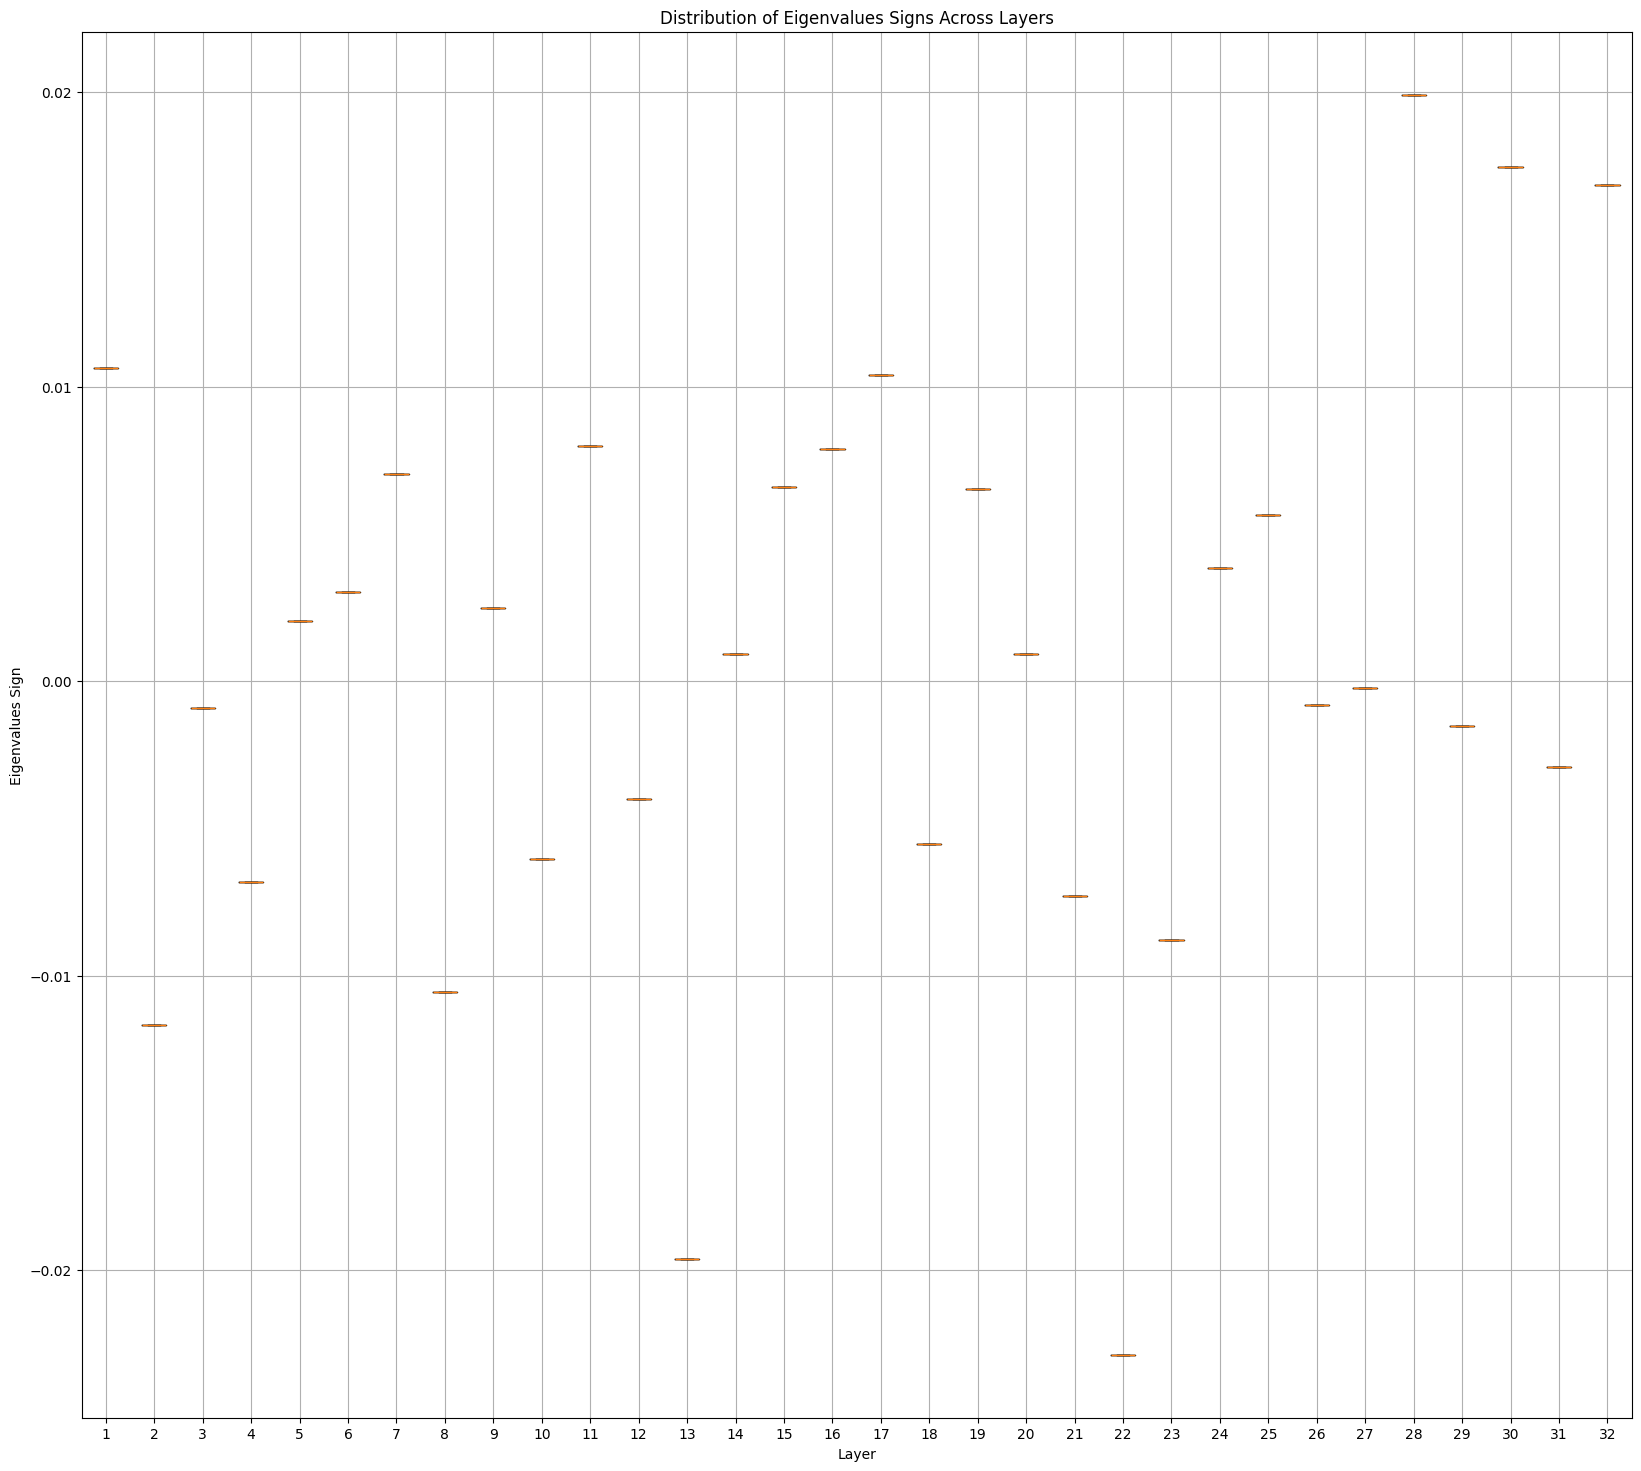

In [43]:
import matplotlib.pyplot as plt
# 绘制箱线图
plt.figure(figsize=(20, 18))
plt.boxplot(np.array(eigenvalues_signs_real_list))
plt.title('Distribution of Eigenvalues Signs Across Layers')
plt.xlabel('Layer')
plt.ylabel('Eigenvalues Sign')
plt.xticks(np.arange(1, 33), np.arange(1, 33))
plt.grid(True)
plt.show()

In [73]:
eigenvalues_signs_real_list[31]

[[0.0008225942,
  0.0064157206,
  0.0061598388,
  0.013385378,
  0.0058643883,
  0.0012882319,
  -0.0069431807,
  -0.022147797,
  -0.014527902,
  -5.469768e-06,
  -0.006094966,
  -0.010467136,
  -0.00016603868,
  0.0077958745,
  0.0041817967,
  -0.009421801,
  -0.015605699,
  -0.03065196,
  -0.003714595,
  -0.002033212,
  -0.008193729,
  0.025615862,
  0.001576665,
  0.0018350799,
  0.009929513,
  0.014946196,
  -0.0056160334,
  -0.019688757,
  0.032947708,
  0.008739083,
  0.013694951,
  -0.002793069],
 [0.0008225942,
  0.0064157206,
  0.0061598388,
  0.013385378,
  0.0058643883,
  0.0012882319,
  -0.0069431807,
  -0.022147797,
  -0.014527902,
  -5.469768e-06,
  -0.006094966,
  -0.010467136,
  -0.00016603868,
  0.0077958745,
  0.0041817967,
  -0.009421801,
  -0.015605699,
  -0.03065196,
  -0.003714595,
  -0.002033212,
  -0.008193729,
  0.025615862,
  0.001576665,
  0.0018350799,
  0.009929513,
  0.014946196,
  -0.0056160334,
  -0.019688757,
  0.032947708,
  0.008739083,
  0.013694951,